https://github.com/Tbhangale/Chicago-Crime-Analysis/blob/master/Visualization.ipynb

https://github.com/Shringa13/Chicago-Crime-Data-Analysis/blob/master/Crime%20Data%20Analysis.ipynb

https://www.kaggle.com/AnalyzeBoston/crimes-in-boston/downloads/crimes-in-boston.zip/2

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

#https://github.com/Shringa13/Chicago-Crime-Data-Analysis/blob/master/Crime%20Data%20Analysis.ipynb
import re
from datetime import datetime
import time
from time import sleep

plt.style.use('seaborn')
from sklearn.cluster import AgglomerativeClustering as AC

In [2]:
crime = pd.read_csv("crime.csv", encoding='latin')

In [3]:
crime_monday = crime[crime['DAY_OF_WEEK']=='Monday']
crime_tuesday = crime[crime['DAY_OF_WEEK']=='Tuesday']
crime_wednesday = crime[crime['DAY_OF_WEEK']=='Wednesday']
crime_thursday = crime[crime['DAY_OF_WEEK']=='Thursday']
crime_friday = crime[crime['DAY_OF_WEEK']=='Friday']
crime_saturday = crime[crime['DAY_OF_WEEK']=='Saturday']
crime_sunday = crime[crime['DAY_OF_WEEK']=='Sunday']

In [4]:
crime.to_csv('df_crime.csv')

In [5]:
df = pd.read_csv('df_crime.csv', index_col='Unnamed: 0')

In [6]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [7]:
df.shape

(319073, 17)

In [8]:
crime_weekly= df.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].count()/len(df)*100
crime_weekly

DAY_OF_WEEK
Friday       15.198716
Monday       14.316160
Saturday     14.046315
Sunday       12.634413
Thursday     14.622359
Tuesday      14.536799
Wednesday    14.645238
Name: DAY_OF_WEEK, dtype: float64

In [9]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
crime_weekly = crime_weekly[sorter]

In [10]:
crime_weekly

DAY_OF_WEEK
Sunday       12.634413
Monday       14.316160
Tuesday      14.536799
Wednesday    14.645238
Thursday     14.622359
Friday       15.198716
Saturday     14.046315
Name: DAY_OF_WEEK, dtype: float64

Text(0.5, 0, 'Day of the Week')

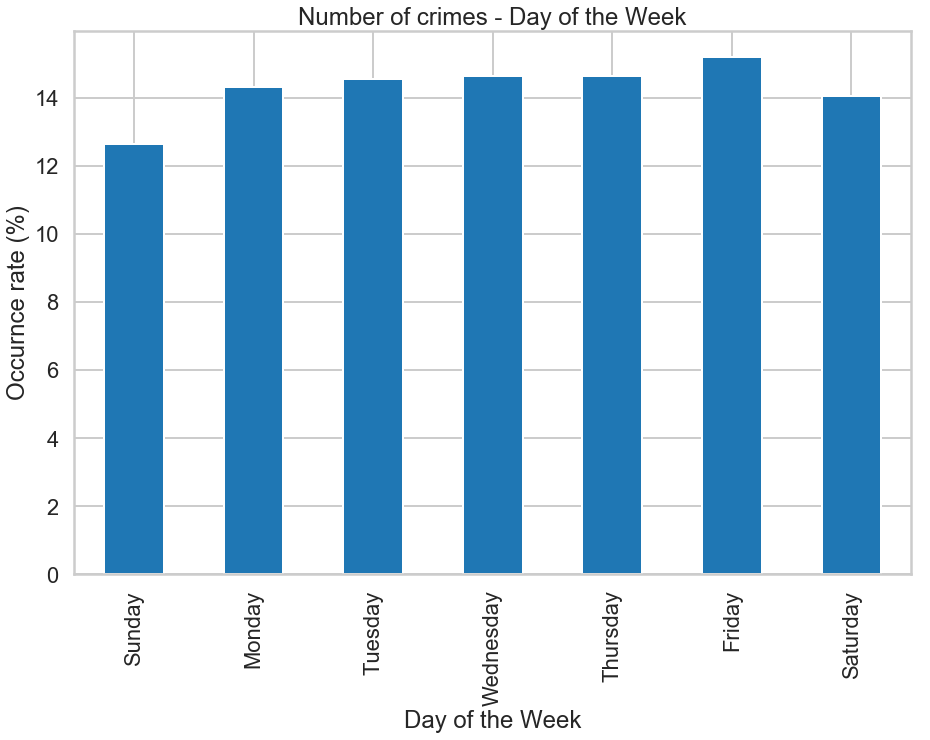

In [11]:
color = ["r", "b", "g", "c", "y", "k", "o"]
crime_weekly.plot(kind='bar', title="Number of crimes - Day of the Week", figsize=(15,10))
plt.ylabel('Occurnce rate (%)')
plt.xlabel('Day of the Week')

In [12]:
crime_yearly= df.groupby(['YEAR'])['YEAR'].count()/len(df)*100

crime_yearly

YEAR
2015    16.732221
2016    31.063111
2017    31.618470
2018    20.586198
Name: YEAR, dtype: float64

Text(0.5, 0, 'Year')

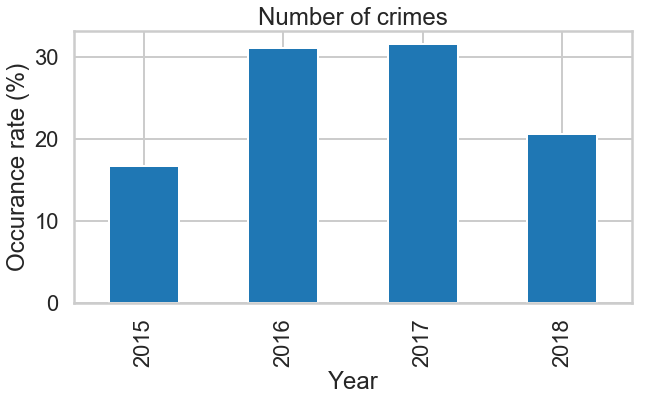

In [13]:
crime_yearly.plot(kind='bar', title="Number of crimes",  figsize=(10,5))
plt.ylabel('Occurance rate (%)')
plt.xlabel('Year')

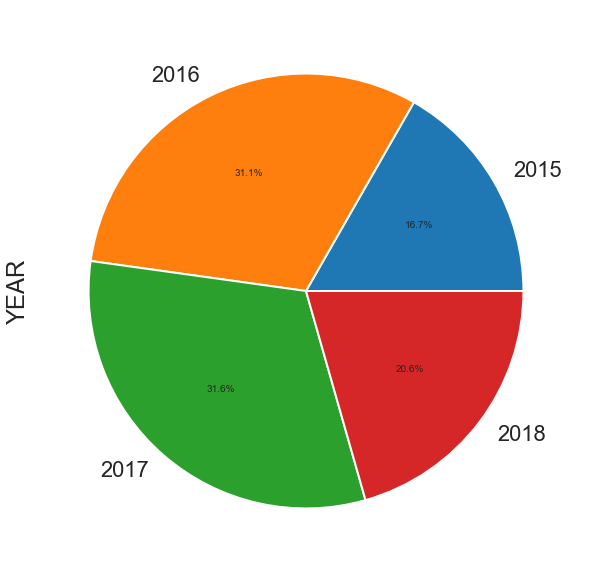

In [14]:
crime_yearly.plot.pie(autopct="%.1f%%", figsize=(20,10))

In [15]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [16]:
df_null = df.isnull().sum()
df_null

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [17]:
df.shape

(319073, 17)

In [18]:
df_shooting = df[['YEAR', 'MONTH', 'DAY_OF_WEEK','SHOOTING']]

In [19]:
df_shooting = df_shooting[df_shooting.SHOOTING.notnull()]

In [20]:
shooting_yearly= df_shooting.groupby(['YEAR'])['YEAR'].count()/len(df_shooting)*100

shooting_yearly

YEAR
2015    18.155054
2016    27.379784
2017    36.310108
2018    18.155054
Name: YEAR, dtype: float64

In [21]:
shooting_monthly= df_shooting.groupby(['MONTH'])['MONTH'].count()/len(df_shooting)*100
explode = [0,0,0,0,0,0,0.05,0,0,0,0,0]
shooting_monthly

MONTH
1      6.869480
2      5.103042
3      3.827282
4      6.967615
5      6.967615
6     11.874387
7     13.248283
8     10.696762
9      7.850834
10     8.439647
11     7.065751
12    11.089303
Name: MONTH, dtype: float64

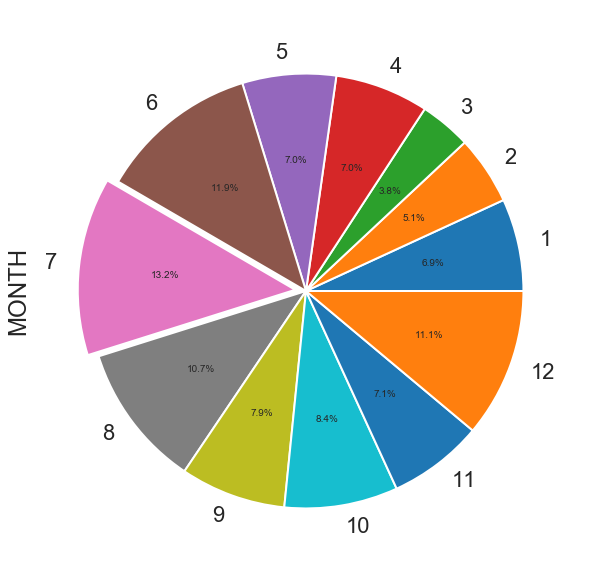

In [22]:
shooting_monthly.plot.pie(autopct="%.1f%%", figsize=(20,10), explode=explode)

In [23]:
df['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [ ]:
df_offense = df.groupby(['OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count()/len(df)*100

In [ ]:
df_offense

OFFENSE_CODE_GROUP
Aggravated Assault                            2.446776
Aircraft                                      0.011283
Arson                                         0.029460
Assembly or Gathering Violations              0.299305
Auto Theft                                    1.520342
Auto Theft Recovery                           0.329392
Ballistics                                    0.307453
Biological Threat                             0.000627
Bomb Hoax                                     0.023506
Burglary - No Property Taken                  0.000627
Commercial Burglary                           0.419026
Confidence Games                              0.986295
Counterfeiting                                0.455695
Criminal Harassment                           0.041056
Disorderly Conduct                            0.818308
Drug Violation                                5.186274
Embezzlement                                  0.092769
Evading Fare                                  

Text(0, 0.5, 'Occurrence rate (%)')

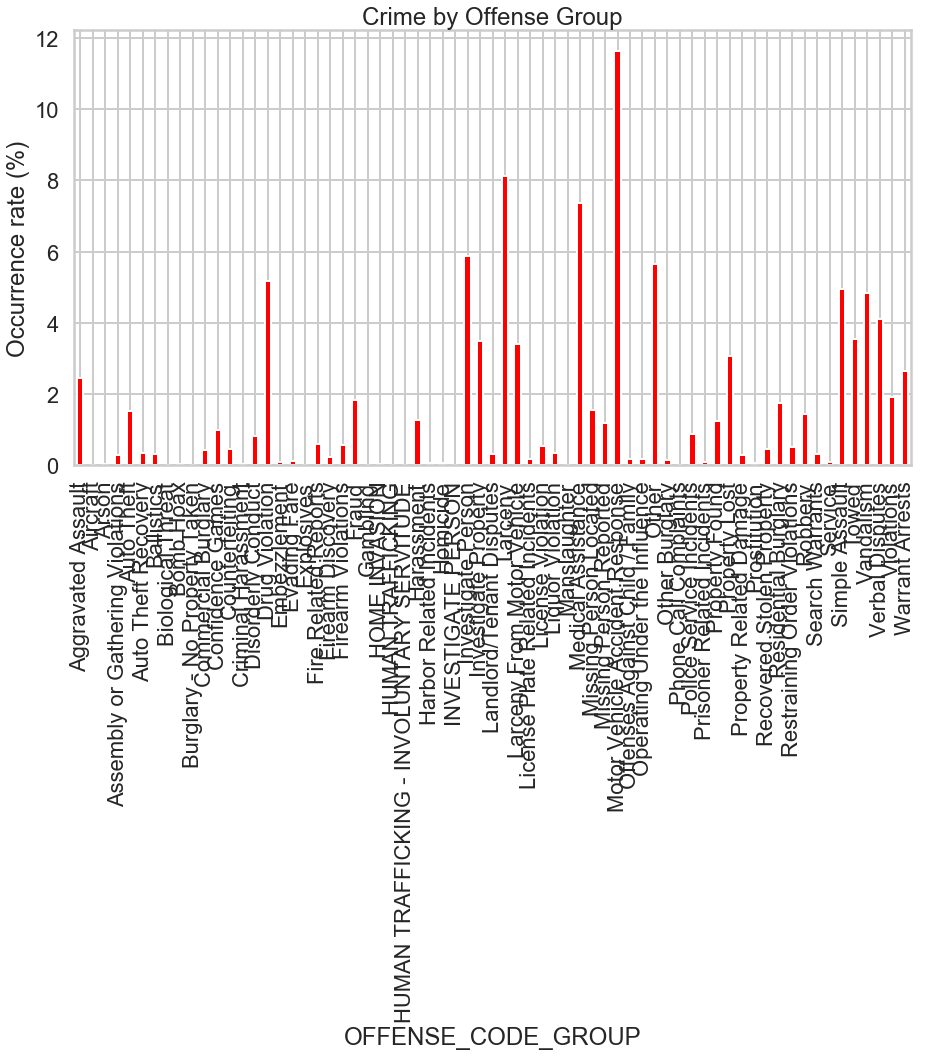

In [ ]:
df_offense.plot(kind='bar',title="Crime by Offense Group", color='r', figsize=(15,8))
plt.ylabel('Occurrence rate (%)')

In [ ]:
df_offense.nlargest(10)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    11.637462
Larceny                             8.128234
Medical Assistance                  7.377622
Investigate Person                  5.876398
Other                               5.664848
Drug Violation                      5.186274
Simple Assault                      4.959993
Vandalism                           4.831183
Verbal Disputes                     4.105330
Towed                               3.537435
Name: OFFENSE_CODE_GROUP, dtype: float64

In [ ]:
larg_offense = df.loc[df['OFFENSE_CODE_GROUP'].isin(["Motor Vehicle Accident Response", "Larceny",
                                     "Medical Assistance", "Investigate Person",
                                     "Other", "Other", "Simple Assault", "Vandalism",
                                     "Verbal Disputes", "Towed"])]
larg_offense.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"


In [ ]:
larg_offense['DAY_OF_WEEK'].unique()

array(['Sunday', 'Tuesday', 'Monday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

In [ ]:
lo_large = larg_offense.groupby(['OFFENSE_CODE_GROUP','DAY_OF_WEEK' ])['OFFENSE_CODE_GROUP','DAY_OF_WEEK'].count()/len(df)*100

In [ ]:
lo_large

OFFENSE_CODE_GROUP  DAY_OF_WEEK
OFFENSE_CODE_GROUP              DAY_OF_WEEK                                 
Investigate Person              Friday                 0.917658     0.917658
                                Monday                 0.835545     0.835545
                                Saturday               0.760014     0.760014
                                Sunday                 0.737449     0.737449
                                Thursday               0.862185     0.862185
                                Tuesday                0.884124     0.884124
                                Wednesday              0.879423     0.879423
Larceny                         Friday                 1.240782     1.240782
                                Monday                 1.169638     1.169638
                                Saturday               1.129522     1.129522
                                Sunday                 0.965296     0.965296
                                Thursday               1.202233     1.202233
                                Tuesday                1.214456     1.214456
                                Wednesday              1.206307     1.206307
Medical Assistance              Friday                 1.059632     1.059632
                                Monday                 1.078437     1.078437
                                Saturday               0.988489     0.988489
                                Sunday                 0.945865     0.945865
                                Thursday               1.102569     1.102569
                                Tuesday                1.083138     1.083138
                                Wednesday              1.119493     1.119493
Motor Vehicle Accident Response Friday                 1.834063     1.834063
                                Monday                 1.604335     1.604335
                                Saturday               1.720609     1.720609
                                Sunday                 1.574248     1.574248
                                Thursday               1.625647     1.625647
                                Tuesday                1.632855     1.632855
                                Wednesday              1.645705     1.645705
Other                           Friday                 0.844007     0.844007
                                Monday                 0.832411     0.832411
...                                                         ...          ...
                                Tuesday                0.867826     0.867826
                                Wednesday              0.874721     0.874721
Simple Assault                  Friday                 0.744030     0.744030
                                Monday                 0.646247     0.646247
                                Saturday               0.755313     0.755313
                                Sunday                 0.776625     0.776625
                                Thursday               0.677588     0.677588
                                Tuesday                0.670066     0.670066
                                Wednesday              0.690124     0.690124
Towed                           Friday                 0.501139     0.501139
                                Monday                 0.533107     0.533107
                                Saturday               0.566015     0.566015
                                Sunday                 0.445979     0.445979
                                Thursday               0.515243     0.515243
                                Tuesday                0.519630     0.519630
                                Wednesday              0.456322     0.456322
Vandalism                       Friday                 0.698273     0.698273
                                Monday                 0.668186     0.668186
                                Saturday               0.763775     0.763775
                                Sunday   

Text(0, 0.5, 'Occurrence rate (%)')

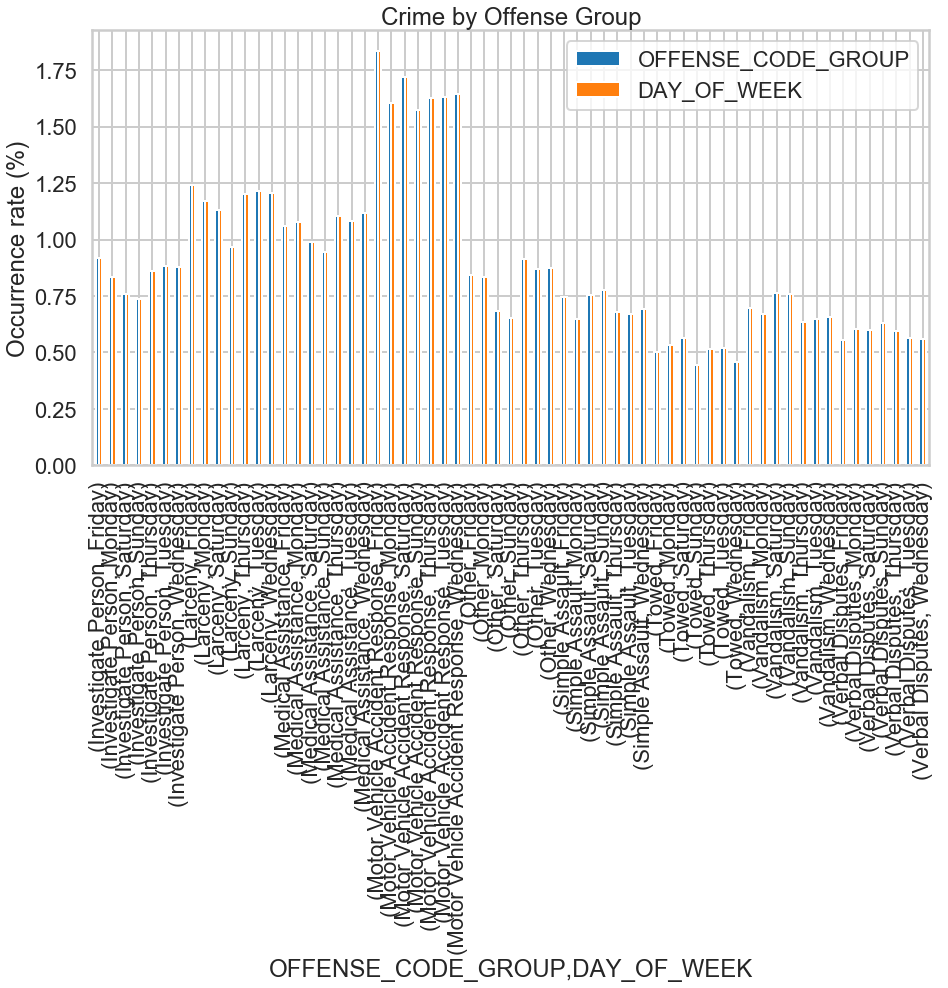

In [ ]:
lo_large.plot(kind='bar',title="Crime by Offense Group", figsize=(15,8))
plt.ylabel('Occurrence rate (%)')

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
# Experiment

In [ ]:
def topeight(row):
    keep = ["Motor Vehicle Accident Response", "Larceny",
            "Medical Assistance", "Investigate Person",
            "Simple Assault", "Vandalism",
            "Verbal Disputes", "Towed"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [ ]:
df["New_Type"] = df["OFFENSE_CODE_GROUP"].apply(topeight)

In [ ]:
def plotsplit(cnam, title):
    datasplit = df.groupby([cnam,"New_Type"])[cnam].count().unstack()
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    datasplit = datasplit[['Motor Vehicle Accident Response', 'Larceny',
                           'Medical Assistance', 'Investigate Person',
                           'Simple Assault', 'Vandalism',
                           'Verbal Disputes', 'Towed']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])     
    

In [ ]:
plt.rcParams["figure.figsize"] = (20,9)

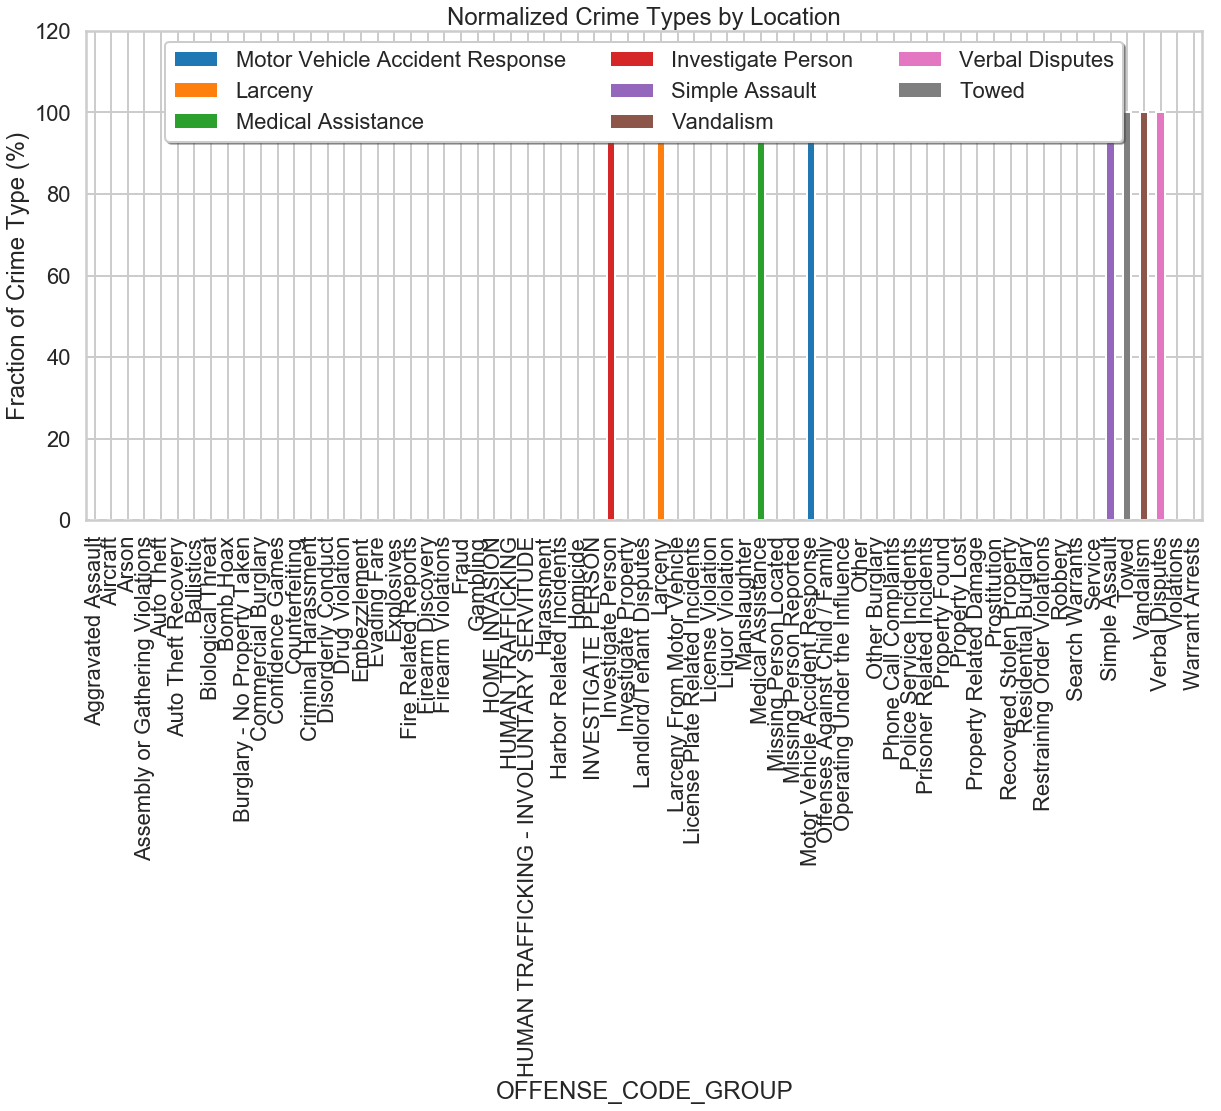

In [ ]:
plotsplit("OFFENSE_CODE_GROUP", "Normalized Crime Types by Location")


# New part

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,New_Type
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Larceny
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Vandalism
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Towed
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",OTHERS
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",OTHERS


In [ ]:
df_new = pd.to_datetime(df['OCCURRED_ON_DATE'])
df_new

0        2018-09-02 13:00:00
1        2018-08-21 00:00:00
2        2018-09-03 19:27:00
3        2018-09-03 21:16:00
4        2018-09-03 21:05:00
5        2018-09-03 21:09:00
6        2018-09-03 21:25:00
7        2018-09-03 20:39:37
8        2018-09-03 20:48:00
9        2018-09-03 20:38:00
10       2018-09-03 19:55:00
11       2018-09-03 20:19:00
12       2018-09-03 19:58:00
13       2018-09-03 20:39:00
14       2018-09-02 14:00:00
15       2018-09-03 19:43:00
16       2018-09-03 18:52:00
17       2018-09-03 17:00:00
18       2018-09-03 19:52:00
19       2018-09-02 18:00:00
20       2018-09-03 18:46:00
21       2018-09-03 18:30:00
22       2018-09-03 18:42:00
23       2018-09-03 18:33:00
24       2018-09-03 18:38:00
25       2018-09-03 18:20:00
26       2018-09-03 18:50:00
27       2018-09-03 18:34:00
28       2018-09-03 18:34:00
29       2018-09-03 18:55:00
                 ...        
319043   2015-07-22 22:00:00
319044   2015-07-22 22:00:00
319045   2016-06-14 09:40:00
319046   2016-

In [ ]:
df_nn =df.set_index(df_new)
df_nn

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,New_Type
OCCURRED_ON_DATE,,,,,,,,,,,,,,,,,,
2018-09-02 13:00:00,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Larceny
2018-08-21 00:00:00,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Vandalism
2018-09-03 19:27:00,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Towed
2018-09-03 21:16:00,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",OTHERS
2018-09-03 21:05:00,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",OTHERS
2018-09-03 21:09:00,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",Motor Vehicle Accident Response
2018-09-03 21:25:00,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",OTHERS
2018-09-03 20:39:37,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)",Verbal Disputes
2018-09-03 20:48:00,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",OTHERS


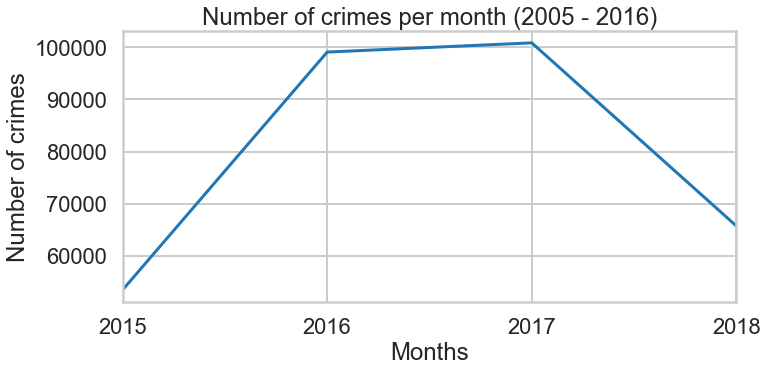

In [ ]:
plt.figure(figsize=(11,5))
df_nn.resample('A').size().plot()
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

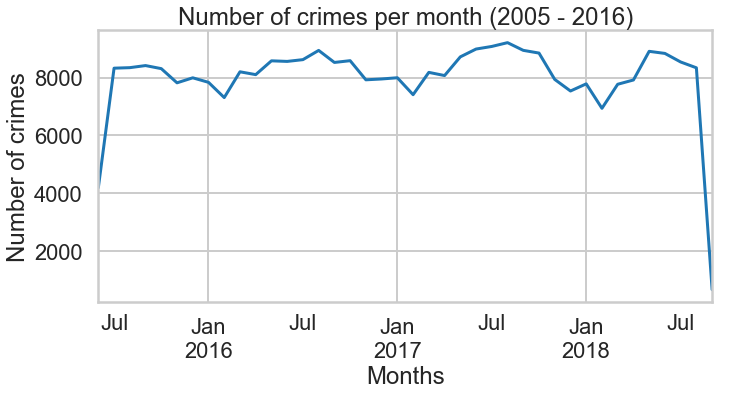

In [ ]:
plt.figure(figsize=(11,5))
df_nn.resample('M').size().plot()
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [ ]:
df.head(1)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,New_Type
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Larceny


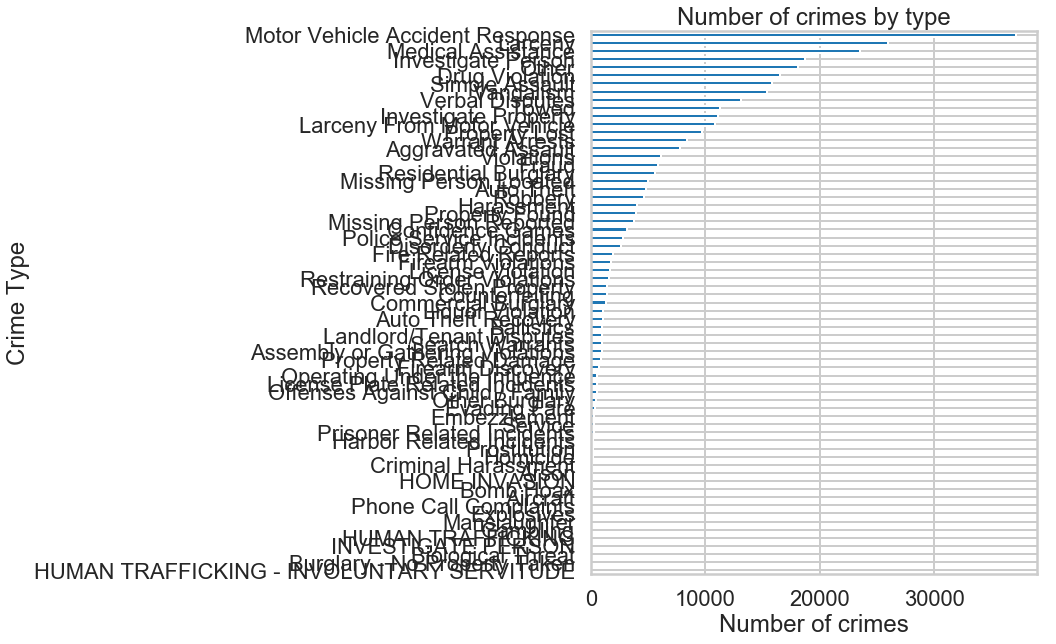

In [ ]:
plt.figure(figsize=(8,10))
df.groupby([df['OFFENSE_CODE_GROUP']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

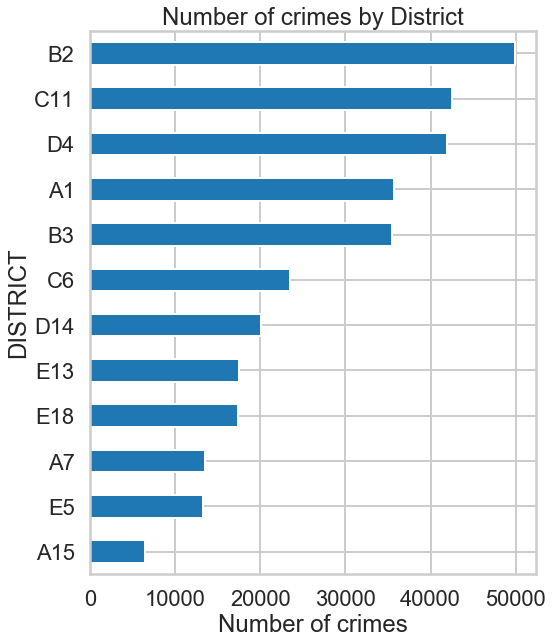

In [ ]:
plt.figure(figsize=(8,10))
df.groupby([df['DISTRICT']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by District')
plt.ylabel('DISTRICT')
plt.xlabel('Number of crimes')
plt.show()

In [ ]:
plt.figure(figsize=(8,30))
df.groupby([df['REPORTING_AREA']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Area in which they were Reported ')
plt.ylabel('Reported Areas')
plt.xlabel('Number of crimes')
plt.show()

In [ ]:
df.head()

In [ ]:
import folium
from IPython.display import HTML

In [ ]:
def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [ ]:
map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
folium.Marker([41.8369, -87.6847]).add_to(map) 
#display(map)